**Importing Dependencies:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

from xgboost import XGBRegressor

**Loading Dataset:**

In [ ]:
df = pd.read_csv('Advertising.csv').drop('Unnamed: 0', axis = 1)

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


**Checking null values:**

In [ ]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

**Checking duplicates:**

In [ ]:
df.duplicated().sum()

0

**Exploratory Data Analysis:**

<Axes: >

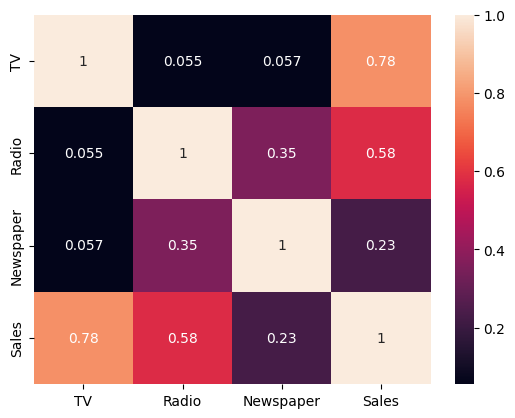

In [ ]:
sns.heatmap(df.corr(), annot = True)

**Feature Importance on Sales:**

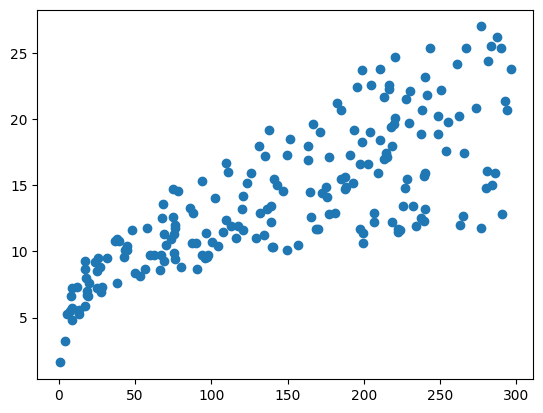

In [ ]:
plt.scatter(df['TV'], df['Sales'])

* As we can see, the correlation between TV and Sales is too high, which indicates the sales gradually increases, as the advertising in TV increases.

**Train test split:**

In [ ]:
X = df.drop('Sales', axis = 1)
y = df.Sales

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Choosing the best model:**

In [ ]:
models = {
    'LinearRegression' : LinearRegression(),
    'Ridge' : Ridge(),
    'Lasso' : Lasso(),
    'ElasticNet' : ElasticNet(),
    'RandomForestRegressor' : RandomForestRegressor(),
    'GradientBoostingRegressor' : GradientBoostingRegressor(),
    'XGBRegressor' : XGBRegressor()
}

In [ ]:
model_list = []
score = []

for i in range(len(models)):
  model = list(models.values())[i]
  model.fit(X_train, y_train)
  print(f'{list(models.keys())[i]} is completed...')
  s = model.score(X_test, y_test)
  score.append(s)

  model_list.append(list(models.keys())[i])

LinearRegression is completed...
Ridge is completed...
Lasso is completed...
ElasticNet is completed...
RandomForestRegressor is completed...
GradientBoostingRegressor is completed...
XGBRegressor is completed...


In [ ]:
pd.DataFrame(list(zip(model_list, score)), columns = ['Model', 'Score']).sort_values(by = 'Score', ascending = False)

,Model,Score
4,RandomForestRegressor,0.972808
5,GradientBoostingRegressor,0.967555
6,XGBRegressor,0.955644
2,Lasso,0.862191
3,ElasticNet,0.861475
1,Ridge,0.860117
0,LinearRegression,0.860115


**Model Training:**

In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)

**Evaluation:**

In [ ]:
print(f"Mean squared error : {mean_squared_error(y_test, pred)}")
print(f"R2 Score : {r2_score(y_test, pred)}")

Mean squared error : 0.8521037000000025
R2 Score : 0.9729228229526617


**Hyperparameter tuning:**

In [ ]:
param_grid = {
    'n_estimators' : [100, 200, 300],
    'max_depth' : [None, 10, 20],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4],
    'max_features' : ['auto', 'sqrt', 'log2']
}

In [ ]:
grid = GridSearchCV(model, param_grid, cv = 5, scoring = 'neg_mean_squared_error', n_jobs = -1)
grid.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [ ]:
print(f"The best parameters are: {grid.best_params_}\nBest Score is: {grid.best_score_}")

The best parameters are: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score is: -0.6737007343750057


In [ ]:
model = RandomForestRegressor(max_depth = None, max_features = 'auto', min_samples_leaf= 1, min_samples_split = 2, n_estimators = 200)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



RandomForestRegressor(max_features='auto', n_estimators=200)

In [ ]:
pred = model.predict(X_test)

In [ ]:
print(f"Mean squared error : {mean_squared_error(y_test, pred)}")
print(f"R2 Score : {r2_score(y_test, pred)}")

Mean squared error : 0.924218581249997
R2 Score : 0.9706312387154922


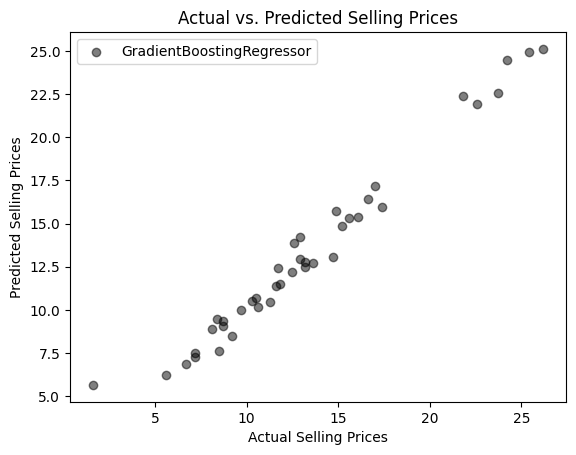

In [ ]:
plt.scatter(y_test, pred, label = 'GradientBoostingRegressor', alpha = 0.5, color = 'black')

plt.xlabel("Actual Selling Prices")
plt.ylabel("Predicted Selling Prices")
plt.title("Actual vs. Predicted Selling Prices")
plt.legend()
plt.show()

**Important Features:**

<Axes: >

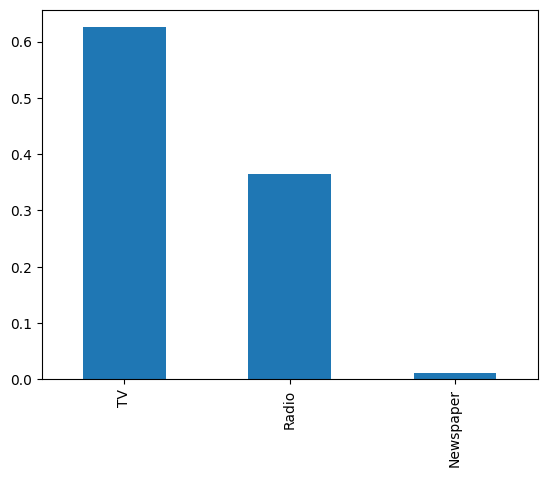

In [ ]:
feature_importance = pd.Series(model.feature_importances_, index = X.columns)

feature_importance.nlargest().plot(kind = 'bar')